In [ ]:
import os
import matplotlib.pyplot as plt
#matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np
import sys
np.set_printoptions(precision=3)
np.set_printoptions(threshold=sys.maxsize)

Compute a mel spectrogram

In [36]:
sig, sample_rate = librosa.load('./audio4.wav')  

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

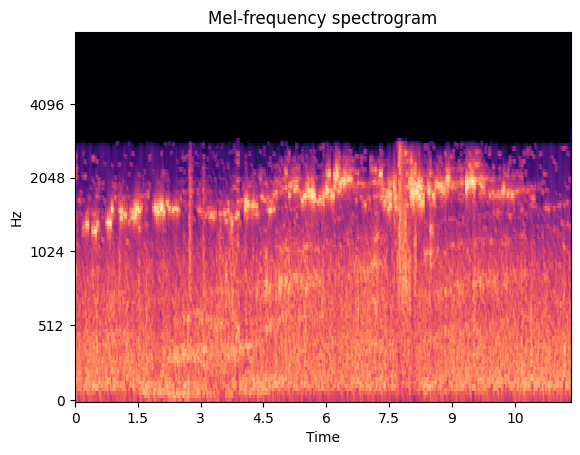

In [37]:
# Mel spectogram
fig, ax = plt.subplots()

mel = librosa.feature.melspectrogram(y=sig, sr=sample_rate, n_mels=128,
                                    fmax=8000)
mel_db = librosa.power_to_db(mel, ref=np.max)
mel_img = librosa.display.specshow(mel_db, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
                         
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Power spectrogram')]

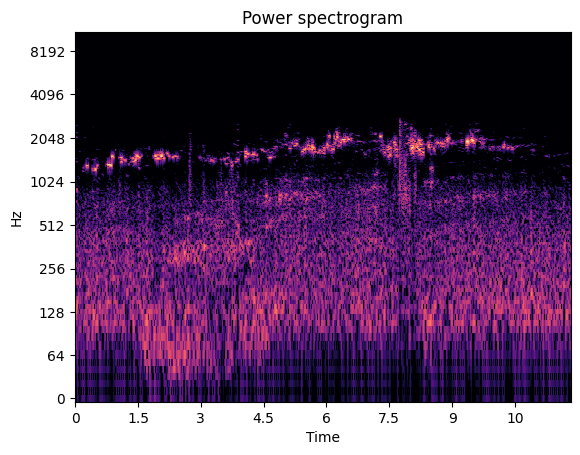

In [38]:
# Short-time Fourier transform
fig, ax = plt.subplots()

stft_specto = np.abs(librosa.stft(sig))**2
stft_db = librosa.amplitude_to_db(np.abs(stft_specto), ref=np.max)
stft_img = librosa.display.specshow(stft_db, y_axis='log', x_axis='time',
                               sr=sample_rate, ax=ax)
ax.set(title='Power spectrogram')

172.265625
[ 52  67  84 101 119]


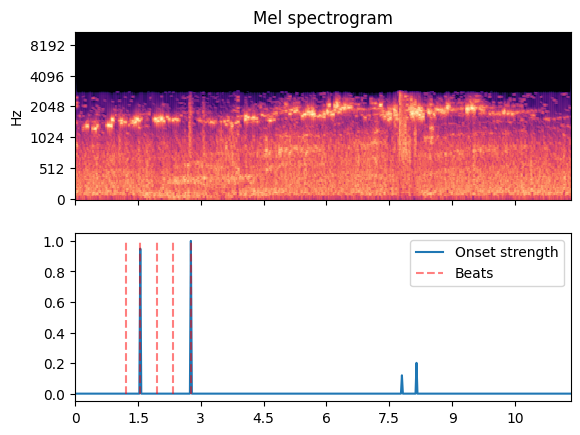

In [42]:
# Compute and display beats
onset_env = librosa.onset.onset_strength(y=sig, sr=sample_rate,
                                         aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sample_rate)
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
print(tempo)
print(beats)
times = librosa.times_like(onset_env, sr=sample_rate, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=sig, sr=sample_rate, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()

[Text(0.5, 1.0, 'Spectrogram')]

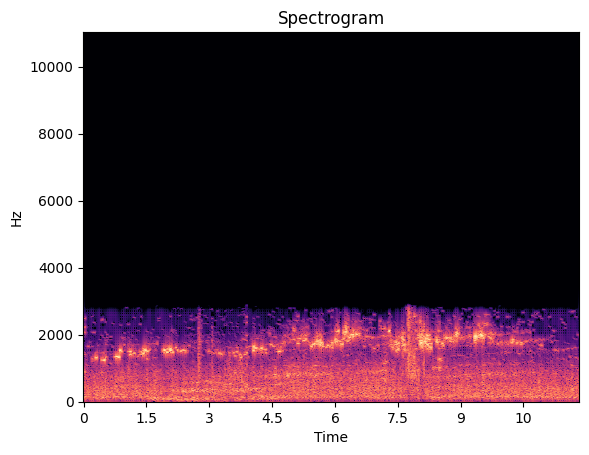

In [40]:
fig, ax = plt.subplots(nrows=1, sharex=True)

specto_db = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)
specto_img = librosa.display.specshow(specto_db, y_axis='linear', x_axis='time',
                               sr=sample_rate, ax=ax)

ax.set(title='Spectrogram')

[Text(0.5, 1.0, 'Chromagram')]

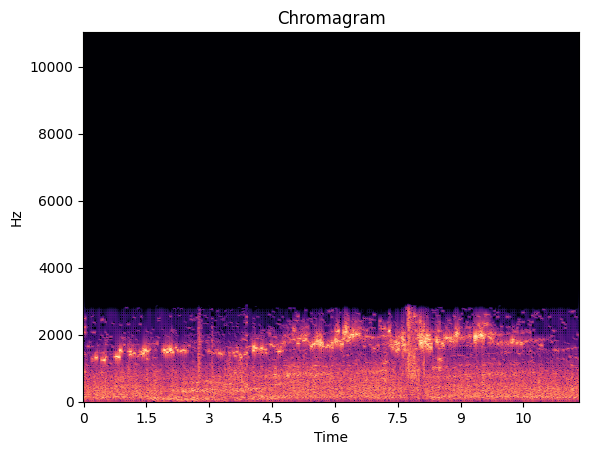

In [41]:
fig, ax = plt.subplots()

stft = np.abs(librosa.stft(sig,center=False))
chroma = np.array(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T)
chroma_db = librosa.amplitude_to_db(np.abs(librosa.stft(chroma)), ref=np.max)
chroma_img = librosa.display.specshow(specto_db, y_axis='linear', x_axis='time',
                               sr=sample_rate, ax=ax)

ax.set(title='Chromagram')

[Text(0.5, 1.0, 'Cqt')]

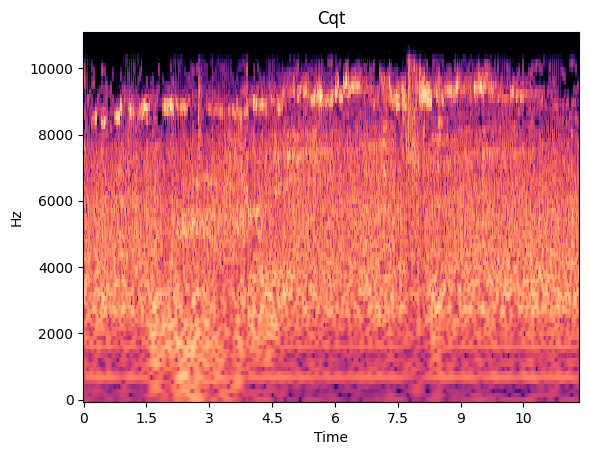

In [39]:
fig, ax = plt.subplots(nrows=1, sharex=True)

cqt = np.abs(librosa.cqt(y=sig, sr=sample_rate))
cqt_db = librosa.amplitude_to_db(cqt, ref=np.max)
cqt_img = librosa.display.specshow(cqt_db, y_axis='linear', x_axis='time',
                               sr=sample_rate, ax=ax)

ax.set(title='Cqt')
